## SOM Branch

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2022-07-20 15:01:53.183883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 15:01:53.183919: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

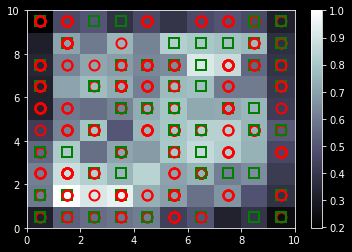

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
    w[1] + 0.5,
    markers[y[i]],
    markeredgecolor = colors[y[i]],
    markerfacecolor = 'None',
    markersize = 10,
    markeredgewidth = 2)
show()

In [6]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(3,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [7]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15805212
15712877
15748499
15781975
15705506
15788215
15655658
15643056
15632503
15680901
15673747
15569917
15713250
15679622


### Going from unsupervised to supervised Deep Learning

In [8]:
customers = dataset.iloc[:, 1:].values

### Creating Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

## Building ANN

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [28]:
ann = tf.keras.models.Sequential()

### Adding input layer and first hidden layer

In [29]:
ann.add(tf.keras.layers.Dense(units=2,input_dim = 15,kernel_initializer= 'uniform', activation='relu'))

### Adding output layer

In [30]:
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer= 'uniform', activation='sigmoid'))

### Compiling ANN

In [31]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
ann.fit(customers, is_fraud, batch_size=1, epochs=10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.4157 - accuracy: 0.9957
Epoch 2/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 1.0000
Epoch 3/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 4/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 5/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 6/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 7/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/10
690/690 [==============================] - 1s 2ms/step - loss: 8.9222e-04 - accuracy: 1.0000
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 5.6929e-04 - accuracy: 1.0000
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 3.6950e-04 - accu

### Predicting test set results

In [33]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
print(y_pred)

22/22 [==============================] - 0s 2ms/step
[[1.57997850e+07 5.64441109e-07]
 [1.56548590e+07 6.53379573e-07]
 [1.57250280e+07 1.24149324e-06]
 ...
 [1.57053790e+07 2.42232974e-03]
 [1.57257760e+07 2.86779692e-03]
 [1.57440440e+07 4.32939874e-03]]
